In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [2]:
# Основная выборка, разбитая на train и test

train = pd.read_csv(Path('../data/raw/train.csv'), sep=';')
test = pd.read_csv(Path('../data/raw/test.csv'), sep=';')

# Дополнительные данные 

ed = pd.read_csv(Path('../data/raw/education.csv'), sep=';')
ws = pd.read_csv(Path('../data/raw/worldskills.csv'), sep=';')
em = pd.read_csv(Path('../data/raw/employements.csv'), sep=';')

C:\Users\glebe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Проверим доп данные

Начнем с образования

In [15]:
ed.head()

,id,graduation_year,institution,description
0,0,2022.0,"""Тульский государственный университет""",NaN
1,1,2016.0,"""Алтайский государственный аграрный университет""",NaN
2,2,2014.0,"""Алтайский государственный технический универс...",NaN
3,3,2003.0,ГОУ СПО ДИМИТРОВГРАДСКИЙ ТЕХНИЧЕСКИЙ КОЛЛЕДЖ,NaN
4,4,2005.0,Нижнетагильский торгово-экономический техникум,NaN


In [9]:
ed.shape[0]

375364

In [8]:
ed['id'].nunique()

375364

У тех у кгого есть образование - всего одна запись

Теперь опыт работы

In [16]:
em.head()

,id,position,employer,achievements,responsibilities,start_date,finish_date
0,0,NaN,"ПАО ""МегаФон""",NaN,<p>Консультирование клиентов по телефону. Прод...,2019-06-01,2020-04-01
1,1,Копирайтер/рерайтер,WorkHardOnline,NaN,<p><strong>✑</strong><strong>Фриланс</strong><...,2019-10-01,NaN
2,2,стажер,Комитет по управлению муниципальной собственно...,NaN,<p>Прохождение производственной практики (30.0...,2014-06-01,2014-07-01
3,3,Консультант,ПАО Почта Банк,NaN,"<p>Работа с клиентами, оформление договоров</p>",2016-04-01,NaN
4,4,Старший специалист по привлечению клиентов,"ОАО Банк ""Открытие""",<p>Расширила базу клиентов</p>,"<p>Обслуживание физических лиц, активное привл...",2011-07-01,2013-01-01


In [10]:
em.shape[0]

343328

In [11]:
em['id'].nunique()

343328

Работа - тоже всего одна запись

И наконец worldskills

In [17]:
ws.head()

,id,status,code,is_international,int_name,ru_name
0,166,Данные подтверждены,R4,False,Preschool Education,Дошкольное воспитание
1,425,Данные в процессе проверки,17,True,Web Design and Development,Веб-дизайн и разработка
2,498,Данные в процессе проверки,33,True,Automobile Technology,Ремонт и обслуживание легковых автомобилей
3,596,Данные в процессе проверки,R45,False,NaN,Специалист по организационному и документацион...
4,1256,Данные в процессе проверки,NaN,NaN,NaN,NaN


In [13]:
ws.shape[0]

1322

In [14]:
ws['id'].nunique()

1322

т.е. можно все замапить 1 к 1

In [4]:
def data_merge(df, ext_df, suffix):
    ext_df = ext_df.copy()
    ext_df.columns = [f'{c}{suffix}'  if c != 'id' else c for c in ext_df.columns]
    return df.merge(ext_df, how='left', on='id')

In [5]:
train = data_merge(train, em, '_em')
train = data_merge(train, ws, '_ws')
train = data_merge(train, ed, '_ed')

In [6]:
test = data_merge(test, em, '_em')
test = data_merge(test, ws, '_ws')
test = data_merge(test, ed, '_ed')

# Проверим целевую метрику

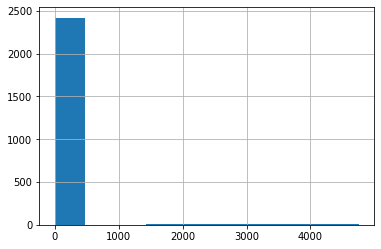

In [7]:
train[train.salary < 5000].salary.hist()

In [37]:
train[train.salary == 0]

,id,position,region,industry,locality,locality_name,education_type,drive_licences,citizenship,schedule,employement_type,age,gender,experience,salary_desired,relocation_ready,travel_ready,retraining_ready,is_worldskills_participant,has_qualifications,completeness_rate,creation_date,modification_date,publish_date,salary,position_em,employer_em,achievements_em,responsibilities_em,start_date_em,finish_date_em,status_ws,code_ws,is_international_ws,int_name_ws,ru_name_ws,graduation_year_ed,institution_ed,description_ed
100,148,Педагог по физической культуре/ ОБЖ,Нижегородская область,"Образование, наука",5200000100000,Нижний Новгород,Незаконченное высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,23.0,Мужской,1,20000,False,True,True,NaN,NaN,74.0,2020-05-19,2020-05-25,2020-05-25,0,Вожатый,"МАУ ДО ДООЦ ""Орленок""",NaN,"<p>Составление плана на день, активная помощь ...",2019-08-01,2019-09-01,NaN,NaN,NaN,NaN,NaN,2020.0,НГПУ им. К. Минина,NaN
161,228,Контент-менеджер,Амурская область,"Маркетинг, реклама, PR",2800000100000,Благовещенск,Высшее,NaN,Российская Федерация,Полный рабочий день,Полная занятость,24.0,Женский,2,25000,False,True,True,NaN,NaN,80.0,2020-07-13,2020-08-17,2020-08-17,0,Начальник отдела внесения информации,"ООО ""Тумаркет""",NaN,"<ul><li style=""text-align: left,"">Обработка и ...",2018-09-01,2020-03-01,NaN,NaN,NaN,NaN,NaN,2018.0,"""Благовещенский государственный педагогический...",NaN
202,283,Экономист,Республика Дагестан,"Финансы, кредит, страхование, пенсионное обесп...",500000600000,NaN,Высшее,NaN,Российская Федерация,Полный рабочий день,Полная занятость,28.0,Женский,0,16000,False,NaN,NaN,NaN,NaN,51.0,2020-07-30,2020-10-19,2020-10-19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,ДАГЕСТАНСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ г.ДЕ...,NaN
378,545,Маркетолог,Чеченская Республика,"Маркетинг, реклама, PR",2000200000600,Катар-Юрт,Среднее,NaN,Российская Федерация,Неполный рабочий день,Частичная занятость,44.0,Женский,2,25000,False,False,True,NaN,NaN,64.0,2020-09-04,2020-09-06,2020-09-05,0,Гардеробщица,"МОУ СОШ 2, Катар-юрт",NaN,"<p>Ответственность&nbsp, верхнюю одежду учащих...",2010-11-01,2012-04-01,NaN,NaN,NaN,NaN,NaN,1993.0,"МОУ СОШ 1, Ачхой-Мартан",NaN
424,608,Администратор СПиР,Московская область,"Туризм, гостиницы, рестораны",5003700100000,Чехов,Незаконченное высшее,[B],Российская Федерация,"Полный рабочий день,Сменный график",Полная занятость,29.0,Женский,9,40000,False,True,True,NaN,NaN,84.0,2020-04-10,2020-12-01,2020-12-01,0,Администратор СПиР,ООО Парк-отель Воздвиженское,NaN,"<p class=""p1""><span class=""s1"">звонков,</span>...",2019-10-01,2020-04-01,NaN,NaN,NaN,NaN,NaN,2021.0,"""Государственная классическая академия имени М...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305899,436991,слесарь по сборке металлоконструкций,Московская область,Производство,5002600010400,Подольск,Среднее профессиональное,[B],Российская Федерация,Полный рабочий день,Полная занятость,48.0,Мужской,20,60000,False,False,True,NaN,NaN,74.0,2020-04-14,2020-05-22,2020-04-17,0,ученик автослесаря,Кисловодское городское производственное объеди...,NaN,<p>ремонт автотранспорта</p>,1991-03-01,1991-12-01,NaN,NaN,NaN,NaN,NaN,1992.0,Ордена Трудового Красного Знамени совхоз-техни...,NaN
306014,437162,уборщица,Нижегородская область,"Работы, не требующие квалификации",5200000000000,Нижегородская,Среднее,NaN,Российская Федерация,"Полный рабочий день,Неполный рабочий день",Частичная занятость,43.0,Женский,0,15000,False,False,True,NaN,NaN,63.0,2020-07-09,2020-07-09,2020-07-09,0,Уборщица лестничных клеток,"ООО ""Жилой Фонд""",NaN,<p>Уборка.</p>,2019-08-01,2019-12-01,NaN,NaN,NaN,NaN,NaN,1996.0,Школа №121,NaN
306059,437227,Продавец,Нижегородская область,"Работы, не требующие квалификации",5200000500000,Бор,Среднее,NaN,Российская Федерация,Полный рабочий день,Полная занятость,30.0,Женский,8,15000,False,False,True,NaN,NaN,61.

In [44]:
import numpy as np

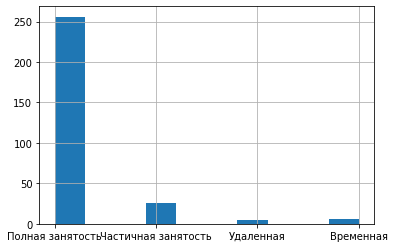

In [41]:
train[(train.salary < 10000) & (train.salary > 0)]['employement_type'].hist()

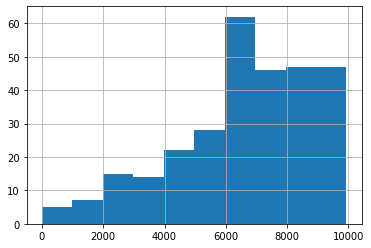

In [42]:
train[(train.salary < 10000) & (train.salary > 0)]['salary'].hist()

In [4]:
train['pub_year'] = pd.train['pub_year'] = pd.to_datetime(train['publish_date'], format="%Y-%m-%d").dt.year
train['pub_month'] = pd.to_datetime(train['publish_date'], format="%Y-%m-%d").dt.month
test['pub_year'] = pd.to_datetime(test['publish_date'], format="%Y-%m-%d").dt.year
test['pub_month'] = pd.to_datetime(test['publish_date'], format="%Y-%m-%d").dt.month